In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
from warnings import warn

In [2]:
def show_sl(sl):
    display(f"TE={sl.total_error}, RE={sl.total_re}")
    
    plot_segment_list(sl.dataframe)
    plt.show()
    print(str(sl))
    display(sl.dataframe)
    display(sl.dataframe.groupby(['seg','axis']).del_t.sum().unstack())
    
    

In [ ]:
sl = SegmentList([Joint(5_000, 50_000), Joint(5_000, 50_000), Joint(5_000, 50_000)])




0.2000|[100        0↗    10@49    ↘0         49] [2000      25↗   220@1222  ↘4       1000] [0         89↗   361@2999  ↘49      2000] 0.47


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,...,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t,err_x
0,0,0,0.2,10.0,0.2,1,100,100,0.075125,0.00100,...,5000,50,0.000000,0.00000,50,1000,10,10,0.20000,0.0000
1,0,1,0.2,250.0,0.2,1,2000,2000,25.061728,0.01556,...,5000,1222,4.938272,0.00444,1000,1000,250,250,0.20000,0.0000
2,0,2,0.2,500.0,0.2,1,500,0,89.295171,0.05976,...,5000,3000,49.295171,0.01976,2000,2000,500,500,0.19972,0.4671


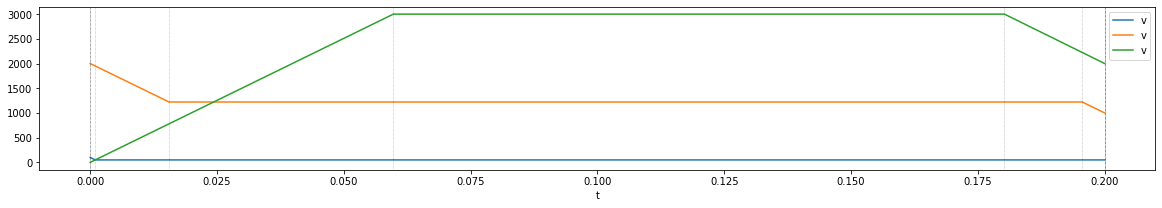

In [48]:
# This move should have an acelleration, then a constant velocity across the three semgments, then decel. It should 
# not have a sawtooth or undulating pattern. 

sl = SegmentList([Joint(5_000, 50_000), Joint(5_000, 50_000), Joint(5_000, 50_000)])
x = 500
sl.rmove([10,x/2,x])

s = sl[0]

s[0].v_0_max = 100
s[1].v_0_max = 2000
s[2].v_0_max = 500

s[0].v_0 = 2500
s[1].v_0 = 2500

s[0].v_1_max = 1000
s[1].v_1_max = 1000
s[2].v_1_max = 2000

s.update()
    
plot_segment_list(sl.dataframe)
print(sl)
sl.dataframe
s.params

In [ ]:
sl = SegmentList([Joint(5000, 50_000, 50_000), Joint(5000, 50_000)])
sl.rmove([1000, 1000])
sl.rmove([500, 1000])
sl.rmove([500, 1000])
sl.rmove([1000, 1000])
sl[2,0].link_velocities()
sl[3,0].link_velocities()
sl.update()
sl.update()
show_sl(sl)

In [ ]:
# Much faster accelerations than the last chart. 
sl = SegmentList([Joint(5000, 300_000, 300_000), Joint(5000, 300_000, 300_000)])
sl.rmove([1000, 1000])
sl.rmove([500, 1000])
sl.rmove([1000, 500])
sl.rmove([300, 1000])
sl.rmove([100, 1000])
sl.rmove([1000, 1000])
sl.update()

show_sl(sl)

In [ ]:
sl = SegmentList([Joint(5000, 300_000, 300_000),Joint(5000, 300_000, 300_000)])
sl.rmove([1000,1000])
sl.rmove([500,1000])
sl.rmove([1000,1000])
sl.rmove([-1000,1000])
sl.rmove([-1000,-1000])
sl.rmove([1000,1000])

show_sl(sl)

In [ ]:
sl.dataframe.head()

In [ ]:
sl = SegmentList([Joint(5000, 300_000, 300_000), Joint(5000, 300_000, 300_000)])
sl.rmove([18000, 20000])
sl.rmove([-100, 5000])
sl.rmove([100, 10000])
sl.rmove([-2500, 1000])
sl.rmove([100, 1000]) ## ERROR! This velocity should not be negative
sl.rmove([1000, 1000]) ## ERROR! This velocity should not be negative

df = sl.dataframe

plot_segment_list(sl.dataframe)
df[df.ss != 'c'].del_t.unique()

In [ ]:
sl = SegmentList([Joint(5000, 30_000, 30_000), Joint(5000, 30_000, 30_000)])
sl.rmove([1000, 500])
sl.rmove([1000, 1000])
sl.rmove([2000, 1000])
sl.rmove([-100, 500])
sl.rmove([100, 1000])
sl.rmove([-2500, 1000])
sl.rmove([100, 1000]) 
sl.rmove([1000, 1000]) ## ERROR! This velocity should not be negative


plot_segment_list(sl.dataframe)

print(sl.positions)

In [ ]:
sl.dataframe.groupby(['seg','axis']).x.sum()

In [ ]:
sl = SegmentList([Joint(33333, 66666)])
x = 5000
sl.rmove([x])
sl.rmove([x])
sl.rmove([-x])
sl.rmove([-x])

df = sl.dataframe

plot_segment_list(sl.dataframe)
for s in sl:
    print(s)

#sl.validate()
print(sl.positions)

In [ ]:
14.908532541958522+85.55207900072237

In [ ]:
sl = SegmentList([Joint(10000, 3000_000, 3000_000), Joint(10000, 3000_000, 3000_000)])

sl.rmove([5.0,-100.0])
sl.rmove([5.0,-100.0])
sl.rmove([-5.0,-100.0])
print(sl)
#sl.update(validate = False)



In [ ]:
10000 / 2500

In [ ]:
import numpy as np

sl = SegmentList([Joint(15000, 30_000, 30_000), Joint(15000, 30_000, 30_000)])

p = []
lx, ly = None,None
for a in np.linspace(0,2*np.pi, 25):
    x = np.sin(a)*1000000
    y = np.cos(a)*1000000
    
    
    if lx is None:
        lx, ly = x,y
        
    
    #print(f"sl.rmove([{x-lx},{y-ly}], validate=False)")
    p.append((x,y))
    sl.add_position_segment([x,y])
    lx, ly = x,y
    
df = pd.DataFrame(p, columns=['x','y'])
df.plot.scatter(x='x', y='y', figsize=(4,4))


#print(sl)
plot_segment_list(sl.dataframe)

In [ ]:
print(sl)

In [ ]:
# Get the points from the subsegments. 
def generate_points(sl):
    t = 0
    x = 0
    y = 0

    for e in sl.sub_segments:
        yield(t, x, y)
        t += e[0].t
        x += e[0].x
        y += e[1].x
l = list(generate_points(sl))

df = pd.DataFrame(l, columns = 't x y'.split()).set_index('t')
df.plot(figsize=(12,6))
df.plot.scatter(x='x', y='y', marker='.',figsize = (8, 8))

In [ ]:
def sim_df(axis, sl):
    simsegs = []
    slsegs = []
    
    for e in sl.sub_segments:
        s = e[axis]

        t, x, v0, v1 = s.t, s.x, s.v_i, s.v_f
        a = float(v1-v0)/float(t)
        if abs(round(x)) !=0:
            slsegs.append([t, x, v0, v1, a])

            simsegs += list(tj.SimSegment(v0,v1,x=x,t=t))
        
    sl_df = pd.DataFrame(slsegs, columns="t x v0 v1 a".split())
        
    df = pd.DataFrame(simsegs,columns=tj.SimSegment.row_header)
    df['tc'] = df.cn.cumsum()
    df['xn'] = df.dir.cumsum()
    df['delay'] = 1 / df.cn
        
    return sl_df, df

def plot2d(df_0, df_1):
    s = pd.DataFrame({'tc':np.linspace(df_0.tc.min(),df_0.tc.max(), 50000)})
    dfx = pd.concat([df_0[['tc','xn']],s], sort=False).sort_values('tc').reindex().interpolate().set_index('tc')\
    .rename(columns={'xn':'x'})
    dfy = pd.concat([df_1[['tc','xn']],s], sort=False).sort_values('tc').reindex().interpolate().set_index('tc')\
    .rename(columns={'xn':'y'})

    df = dfx.join(dfy)
    
    df.plot.scatter(x='x', y='y', marker='.', figsize = (8, 8))


sl_df_0, df_0 = sim_df(0,sl)

sl_df_1, df_1 = sim_df(1,sl)

ax = df_0.plot(x='tc', y='xn', figsize = (20, 8) )
ax = df_1.plot(ax=ax,x='tc', y='xn')

plot2d(df_0, df_1)